In [2]:
import statistics
from PIL import ImageFont, ImageDraw, Image  
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Transparent Microsoft logo

In [ ]:
microsoft = np.ones((310,689,4), dtype=np.uint8)
microsoft[:,:,:] = [0, 0, 0, 0]

microsoft[104:152, 104:152] = [242, 80, 34, 255]
microsoft[157:206, 104:152] = [1, 164, 239, 255]
microsoft[104:152, 157:206] = [127, 186, 0, 255]
microsoft[157:206, 157:206] = [255, 185, 1, 255]

image = Image.fromarray(microsoft)  

draw = ImageDraw.Draw(image)  
   
 # use a truetype font  
font = ImageFont.truetype('input\Segoe UI Bold.ttf', 77)

draw.text((236,100), "Microsoft", font=font)  

image.save("output/microsoft.png")

## Color Recognition

In [7]:
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('input/colors.mp4')
_, frame = cap.read()
rows, cols, _ = frame.shape
n = 0

writer = cv2.VideoWriter('output\mamad.mp4', cv2.VideoWriter_fourcc(*'MJPG'), 30, (cols, rows))

while True:
    n+=1
    _, frame_org = cap.read()
    frame_detect = frame_org[(rows//2 - 50):(rows//2 + 50), (cols//2 - 50):(cols//2 + 50)].copy()
    frame_filtered = cv2.blur(frame_org, [15, 15]) 
    cv2.rectangle(frame_filtered, (cols//2 - 50,rows//2 - 50), (cols//2 + 50,rows//2 + 50), 0,8)
    mean = np.mean(frame_detect, axis=(0,1))
    var = statistics.variance(mean)
    if mean[2] > (mean[0] + mean[1])*0.9:
        color = 'Red'
    elif mean[1] > (mean[0] + mean[2])*0.9:
        color = 'Green'
    elif mean[0] > (mean[1] + mean[2])*0.9:
        color = 'Blue'
    elif mean[1] > mean[0]*1.7 and mean[2] > mean[0]*1.7:
        color = 'Yellow'
    elif mean[2] > (mean[0] + 30) and mean[2] > (mean[0] + 30):
        color = 'Orange'
    elif mean[2] > mean[1]*2 and mean[0] > mean[1]*2:
        color = 'Purple'
    elif var < 50 and np.mean(mean) > 100:
        color = 'White'
    elif var < 10 and np.mean(mean) < 60:
        color = 'Black'
    else:
        color = 'unknown'
    # cv2.putText(frame_filtered, str(var), (100,50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 0, thickness= 1)
    cv2.putText(frame_filtered, color, (150,50), cv2.FONT_HERSHEY_SIMPLEX, 0.7, 0, thickness= 1)
    frame_filtered[(rows//2 - 50):(rows//2 + 50), (cols//2 - 50):(cols//2 + 50)] = frame_detect
    writer.write(frame_filtered)
    cv2.imshow('result', frame_filtered)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
    if n == 1641:
        break

writer.release()
cap.release()
cv2.destroyAllWindows()


## MediaPipe

In [3]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

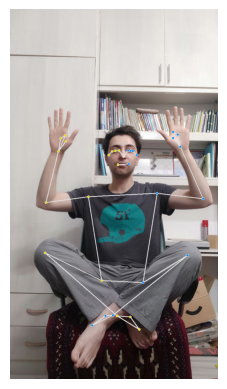

In [2]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import matplotlib.pyplot as plt

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("input/me5.jpg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.imshow(annotated_image)
cv2.imwrite('output/me5.jpg',cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
plt.axis('off')
plt.show()

## PIL (Python Imaging Library)

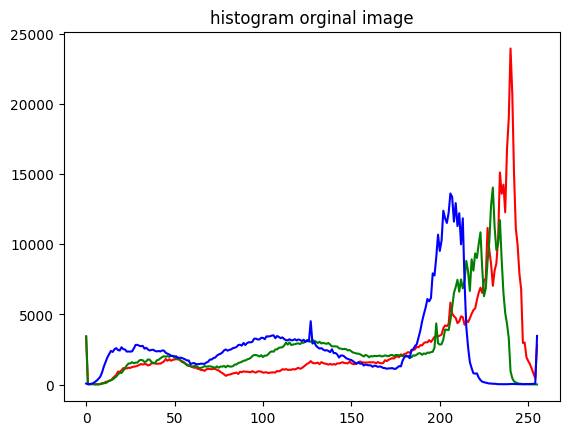

In [3]:
from PIL import ImageFont, ImageDraw, Image  
import arabic_reshaper
from bidi.algorithm import get_display
import numpy as np

image = Image.open('input\creation-adam.jpg') 
font = ImageFont.truetype('input\B Nazanin.ttf', 100)
draw = ImageDraw.Draw(image) 
text = 'خلقت انسان'
reshaped_text = arabic_reshaper.reshape(text)    # correct its shape
bidi_text = get_display(reshaped_text)           # correct its direction
draw.text((100,30), bidi_text, font=font, fill='blue')  

image.save("output/orgial image.png")
# image.show() 

def histogram(image):
    Histogram = np.zeros(256, dtype=np.uint64)
    values, counts = np.unique(image, return_counts=True)
    for num in values:
        Histogram[num] = counts[np.where(values == num)[0]]
    
    return Histogram

image_array = np.array(image)
hist = histogram(image_array[:,:,0])
plt.plot(hist, 'r')
hist = histogram(image_array[:,:,1])
plt.plot(hist, 'g')
hist = histogram(image_array[:,:,2])
plt.plot(hist, 'b')
plt.title('histogram orginal image')
plt.show()

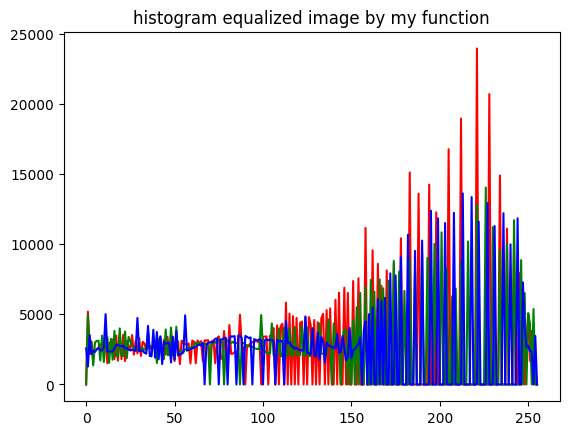

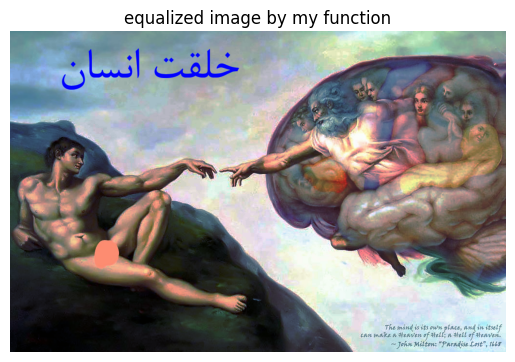

In [4]:
def equalizes_histogram(image):
    result = np.zeros((image.shape[0],image.shape[1]), dtype=np.uint8)
    Sk = np.zeros(256)
    hist = histogram(image)
    constant = float(254.0/(image.shape[0]*image.shape[1]))
    Sk[0] = constant*hist[0]
    for i in range(1,256):
        Sk[i] = constant*hist[i] + Sk[i-1]

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i,j] = Sk[image[i,j]]

    return result

image_array_equal_r = equalizes_histogram(image_array[:,:,0])
hist = histogram(image_array_equal_r)
plt.plot(hist, 'r')
image_array_equal_g = equalizes_histogram(image_array[:,:,1])
hist = histogram(image_array_equal_g)
plt.plot(hist, 'g')
image_array_equal_b = equalizes_histogram(image_array[:,:,2])
hist = histogram(image_array_equal_b)
plt.plot(hist, 'b')
plt.title('histogram equalized image by my function')
plt.show()

new_image = np.zeros((image_array.shape[0],image_array.shape[1],3), dtype=np.uint8)
new_image[:,:,0] = image_array_equal_r
new_image[:,:,1] = image_array_equal_g
new_image[:,:,2] = image_array_equal_b
plt.imshow(new_image)
plt.axis('off')
plt.title('equalized image by my function')
plt.show()
    

### Gray

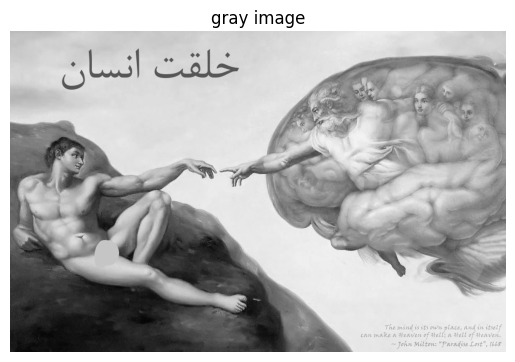

In [5]:
def color2gray(image):
    result = np.mean(image, axis=2, dtype=np.uint16)
    return result

image_gray = color2gray(image_array)
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.title('gray image')
plt.show()

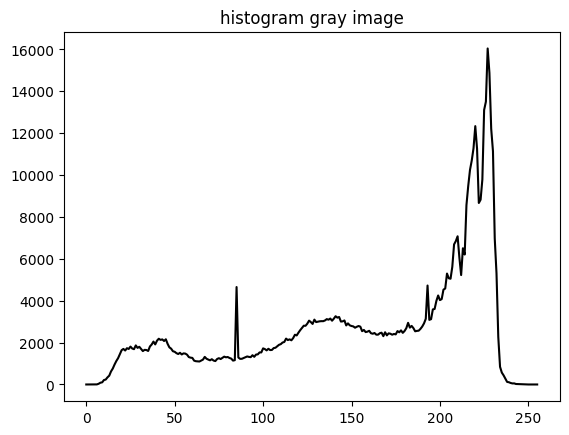

In [6]:
hist = histogram(image_gray)
plt.plot(hist, 'k')
plt.title('histogram gray image')
plt.show()

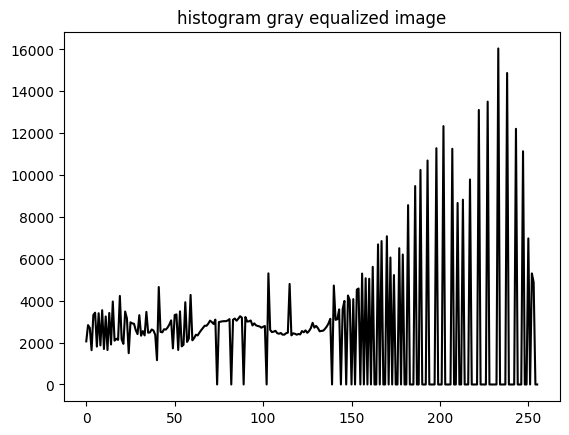

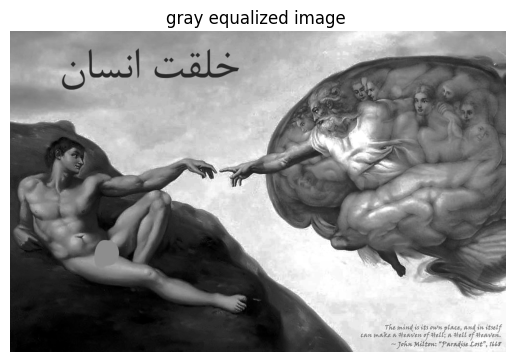

In [7]:
image_gray_equa = equalizes_histogram(image_gray)

hist = histogram(image_gray_equa)
plt.plot(hist, 'k')
plt.title('histogram gray equalized image')
plt.show()

plt.imshow(image_gray_equa, cmap='gray')
plt.axis('off')
plt.title('gray equalized image ')
plt.show()